## Intsalling Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#### Load the data

In [2]:

red_wine_df = pd.read_csv('wine+quality\\winequality-red.csv', delimiter=";")
white_wine_df = pd.read_csv('wine+quality\\winequality-white.csv', delimiter=";")

In [3]:
red_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
# Add wine type
red_wine_df["wine_type"] = 0
white_wine_df["wine_type"] = 1

# Combine
df = pd.concat([red_wine_df, white_wine_df], axis=0).reset_index(drop=True)

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          0  
4      9.4        5          0

# Explore and Clean Data
- Check null values, duplicates, outliers.
- No categorical features except wine_type (already handled).

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine_type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


In [9]:
# Check Misiing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [10]:
# Check Duplicates
print(df.duplicated().sum())


1177


In [11]:
## Display the value counts of quantitycolums
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

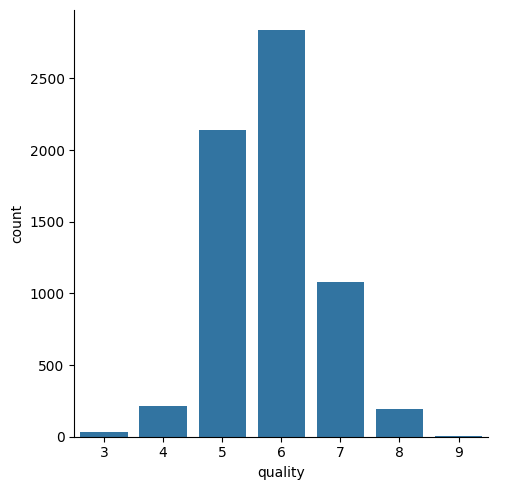

In [12]:
# Plot distribution of wine quality
sns.catplot(x = 'quality', kind="count", data=df)

## Data Visulaization

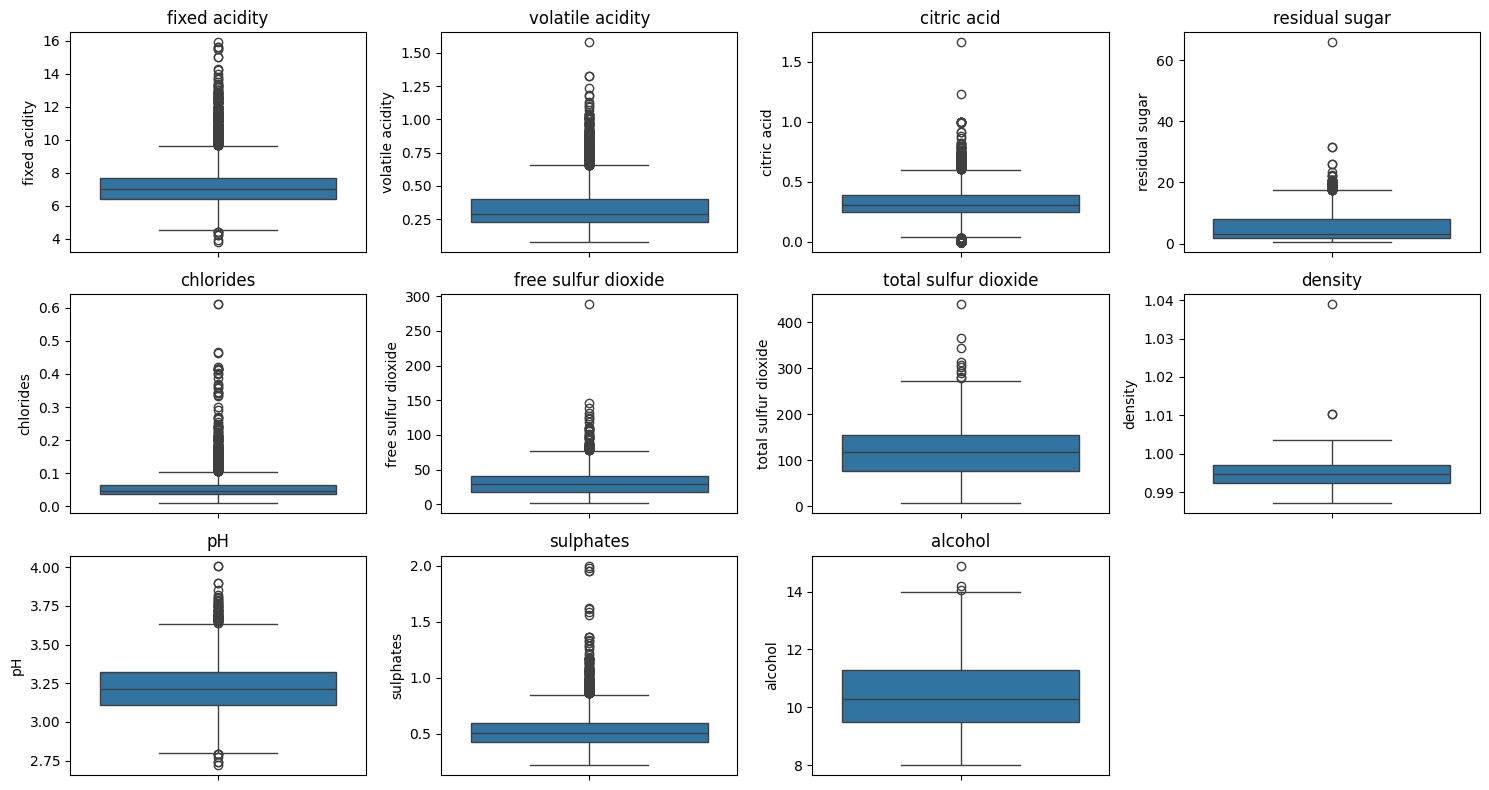

In [13]:
plt.figure(figsize=(15,8))
for i, col in enumerate(df.columns[:-2], 1):  # exclude quality & wine_type
    plt.subplot(3,4,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Bivariate Analysis

C:\Users\ramme\AppData\Local\Temp\ipykernel_9204\3516889625.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


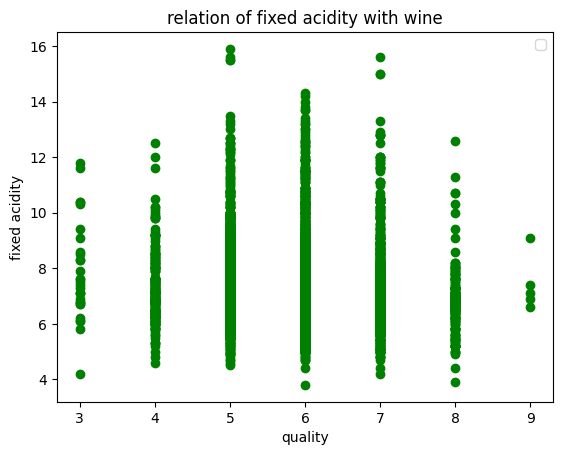

In [14]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

C:\Users\ramme\AppData\Local\Temp\ipykernel_9204\1934193292.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


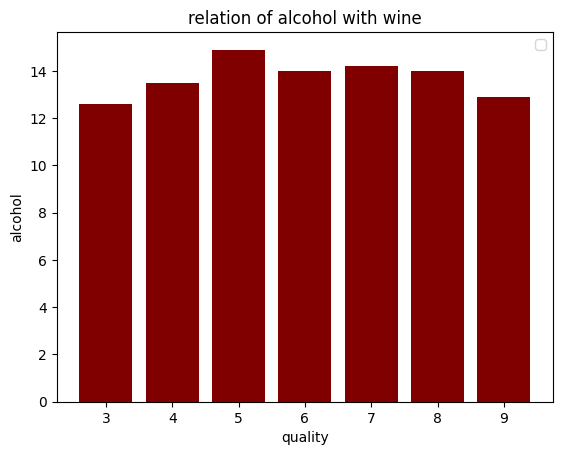

In [15]:
# checking the variation of alcohol in the different qualities of wine

plt.bar(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

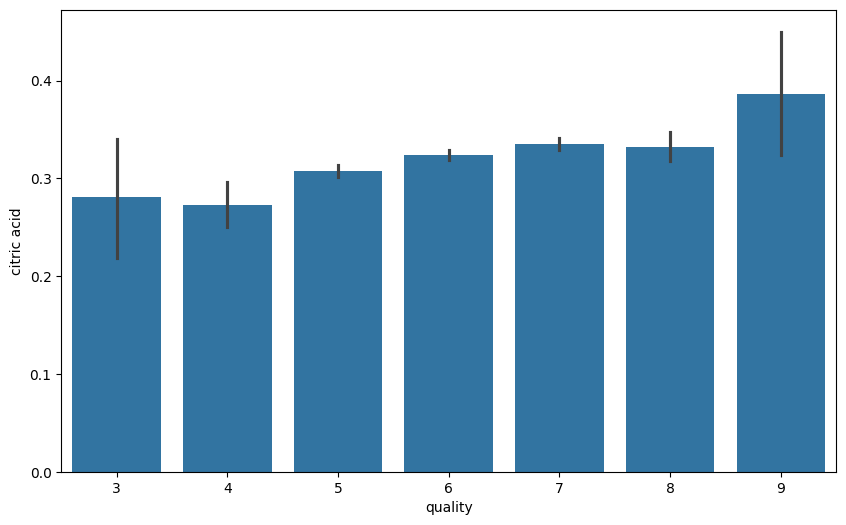

In [16]:
# Bar plot for citiric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

##### 
- Composition of citric acid go higher as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='residual sugar'>

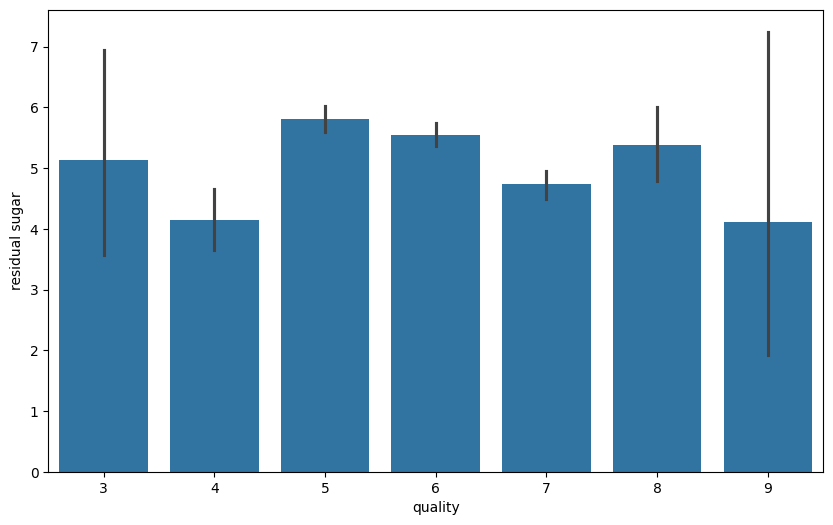

In [17]:
# Bar plot for residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

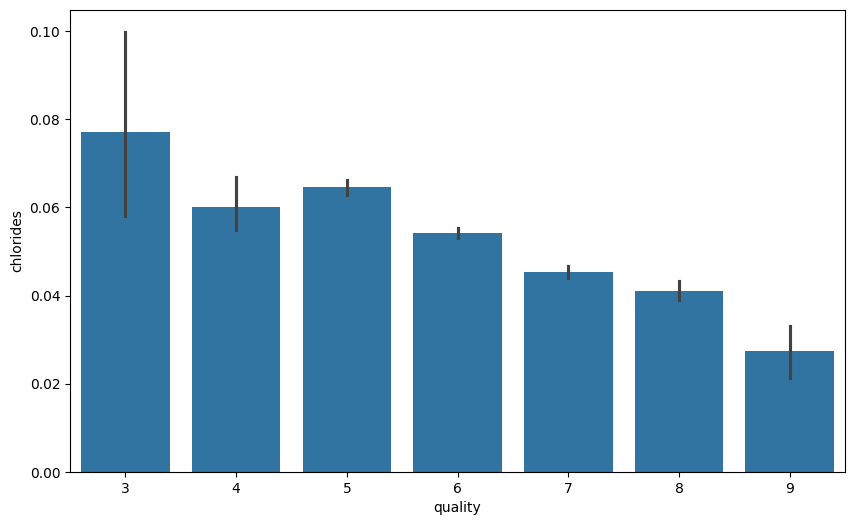

In [18]:
# Bar plot for chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

#### 
- Composition of chloride also go down as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

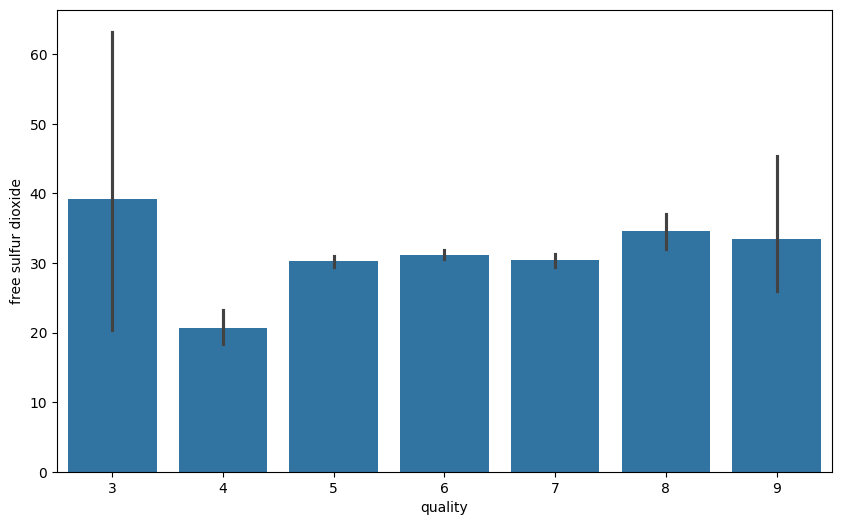

In [19]:
# Bar plot for free sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

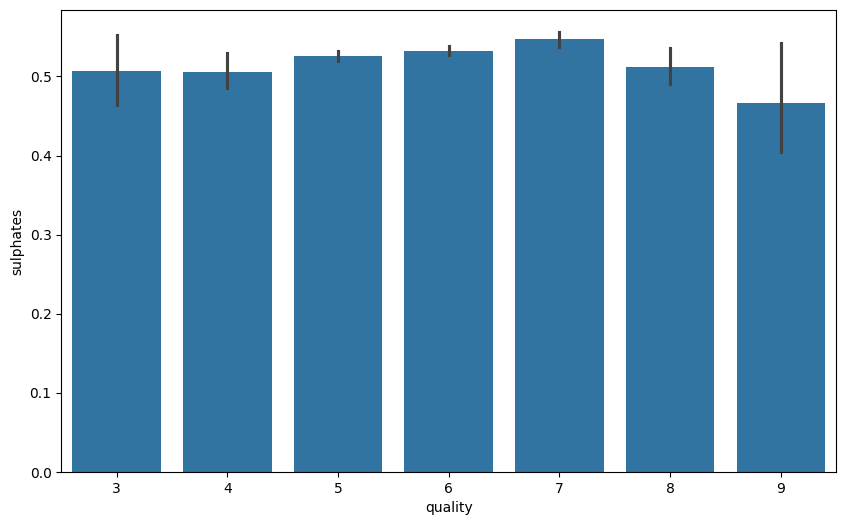

In [20]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

##### 

- As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

#### Correlation Analysis

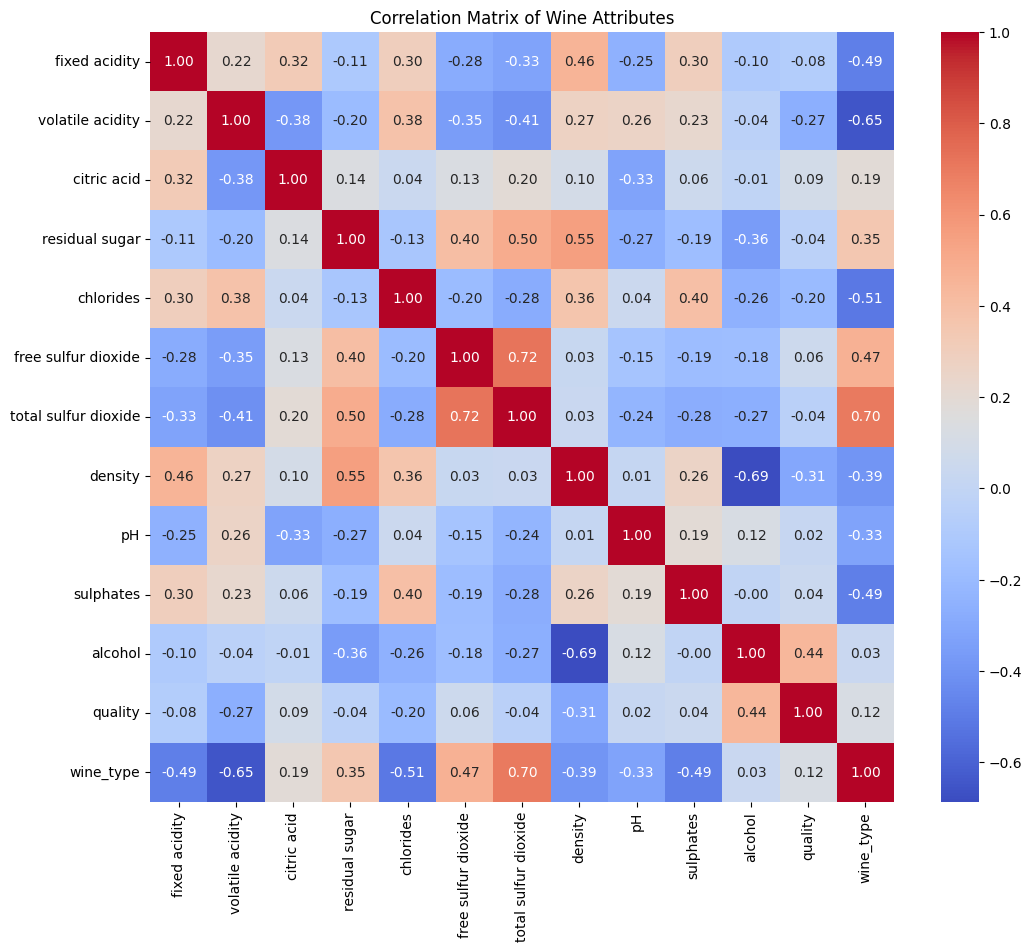


Correlation with Quality:
quality                 1.000000
alcohol                 0.444319
wine_type               0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

# Print the correlations with 'quality' for a quick view
print("\nCorrelation with Quality:")
print(correlation_matrix['quality'].sort_values(ascending=False))

#### 
Summary of Heatmap:
- Strong predictors: alcohol, volatile acidity, density, chlorides, wine_type.
- Useful (keep for now): citric acid, sulphates.
- Weak (can drop after testing): pH, residual sugar, total sulfur dioxide, free sulfur dioxide, fixed acidity.

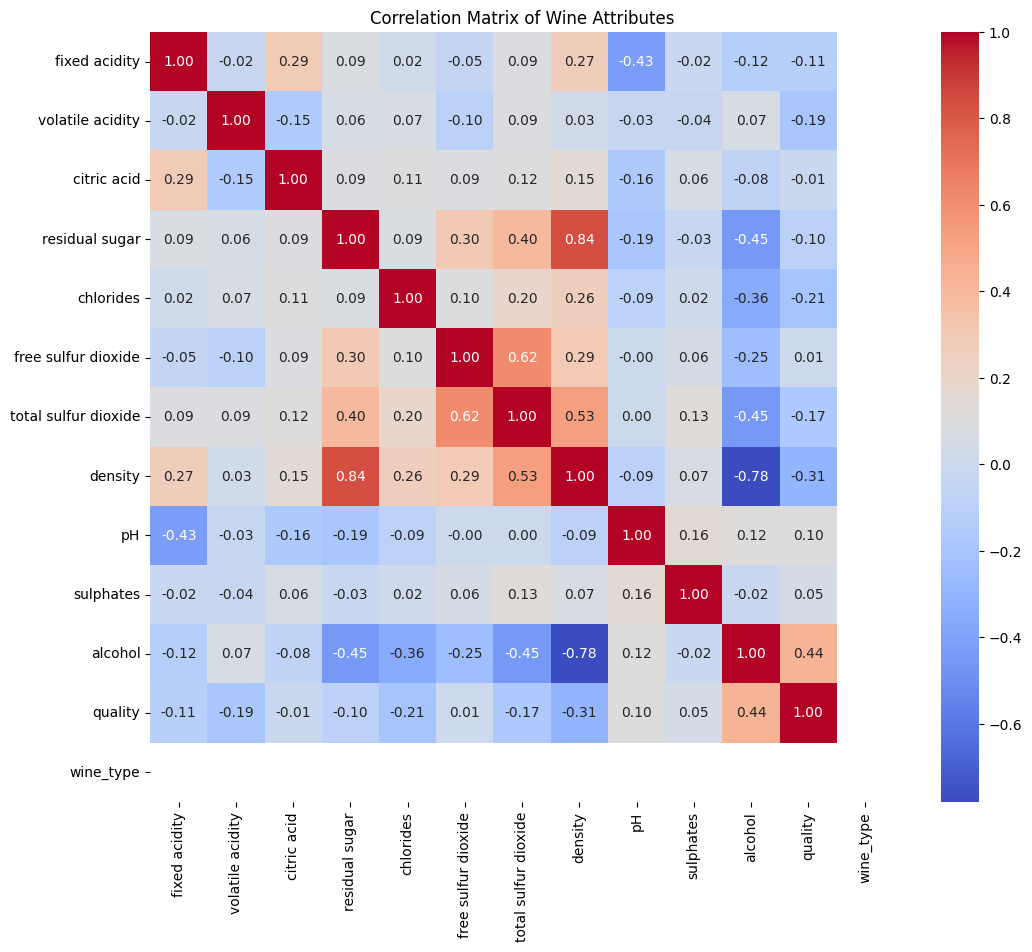

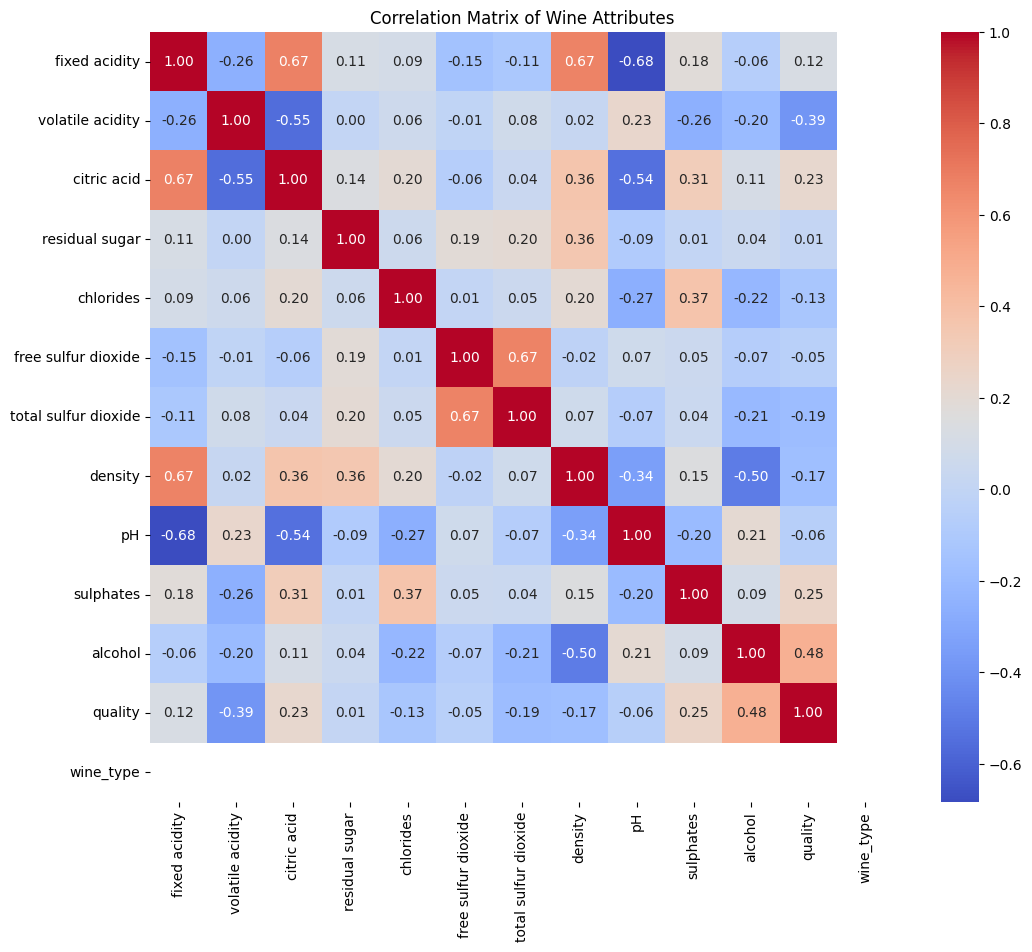

In [22]:
# Calculate the correlation matrix
correlation_matrix = white_wine_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.show()


# Calculate the correlation matrix
correlation_matrix = red_wine_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

###### 
From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.

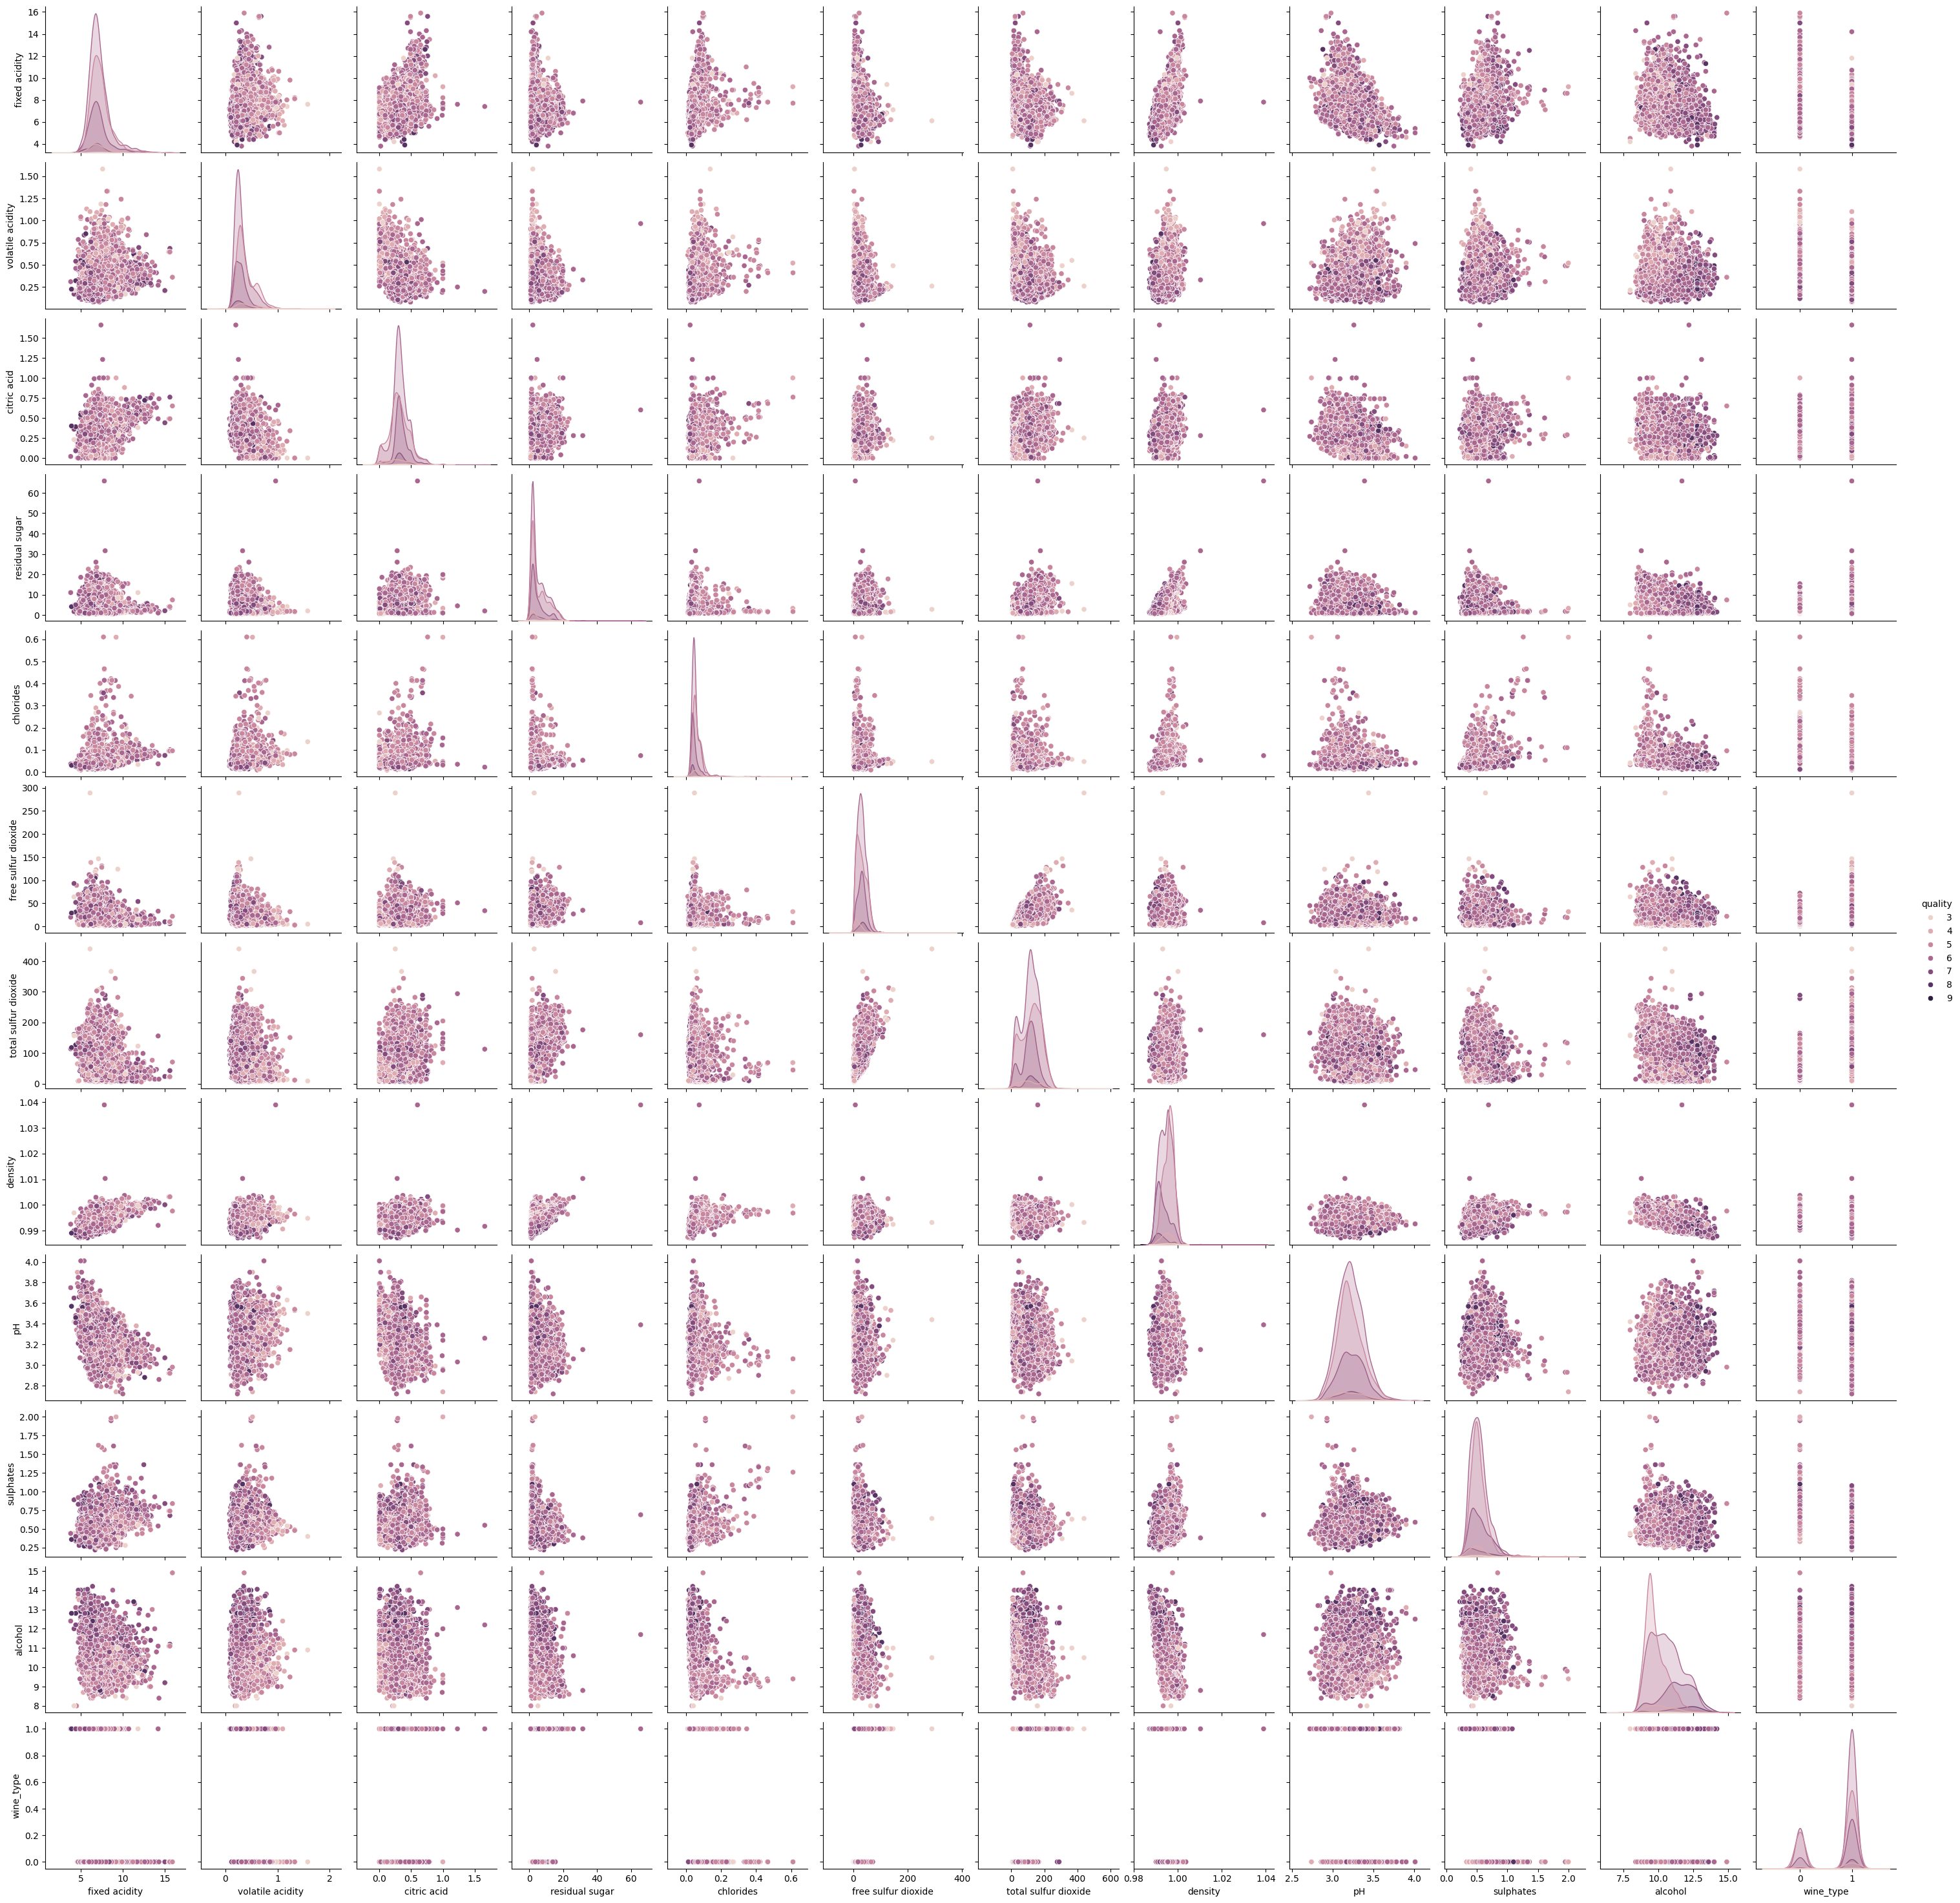

In [23]:
sns.pairplot(df, hue='quality')

## Data pre-processing

In [24]:
 
 # print original shape
print("Shape before cleaning:", df.shape)


Shape before cleaning: (6497, 13)


In [25]:
num_duplicates = df.duplicated().sum() # count duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 1177


In [26]:
if num_duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True) # drop duplicates and reset index
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (5320, 13)


In [27]:
# Create a classification target (optional) while keeping the regression target.
# "quality" = original numeric target (3–9). We'll add "quality_label" for classification.

def quality_label(q):
    """
    Map numeric quality score to categorical label:
    - 3–5 -> 'low'
    - 6   -> 'medium'
    - 7–9 -> 'high'
    """
    if q <= 5:
        return 'low'
    elif q == 6:
        return 'medium'
    else:
        return 'high'

# Apply mapping to create a new classification column
df['quality_label'] = df['quality'].apply(quality_label)

# Display class distribution for the new labels
print("Quality label distribution:")
print(df['quality_label'].value_counts())


Quality label distribution:
quality_label
medium    2323
low       1988
high      1009
Name: count, dtype: int64


In [28]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type quality_label  
0      9.4        5          0           low  
1      9.8        5          0           low  
2      9.8        5          0           low  
3      9.8        6          0        medium  
4      9.4        5          0           low

In [29]:
# Encode quality_label into numeric form for ML
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_label_enc'] = le.fit_transform(df['quality_label'])

# Show the mapping
print("Label Encoding Mapping:")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} -> {code}")

Label Encoding Mapping:
high -> 0
low -> 1
medium -> 2


In [30]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type quality_label  quality_label_enc  
0      9.4        5          0           low                  1  
1      9.8        5          0           low                  1  
2      9.8        5          0           low                  1  
3      9.8        6          0        medium                  2  
4      9.4        5          0           low                  1

### Select Features


In [31]:
# Features and target
X = df.drop(columns=['quality', 'quality_label', 'quality_label_enc'])  # features only
y = df['quality_label_enc']

In [32]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  wine_type  
0         9.4          0  
1         9.8          0  
2         9.8          0  
3         9.8          0  
4         9.4          0  
...       ...        ...  
5315     11.2          1  
5316      9.6          1  
5317      9.4          1  
5318     12.8          1  
5319     11.8          1  

[5320 rows x 12 columns]

In [33]:
y

0       1
1       1
2       1
3       2
4       1
       ..
5315    2
5316    1
5317    2
5318    0
5319    2
Name: quality_label_enc, Length: 5320, dtype: int64

### Train-Test Splitting

In [34]:
# Train-test split with stratification to preserve class distribution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




### Model Training

c:\Users\ramme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         low       0.40      0.67      0.50       202
      medium       0.65      0.73      0.69       397
        high       0.56      0.34      0.43       465

    accuracy                           0.55      1064
   macro avg       0.54      0.58      0.54      1064
weighted avg       0.56      0.55      0.54      1064



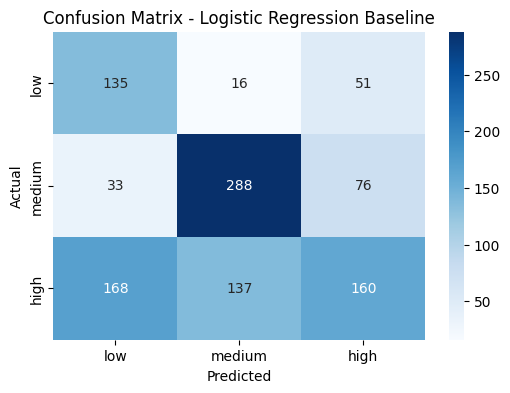

In [35]:
# ================================
#  Baseline Model : Logistic Regression
# ================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression with balanced class weights
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['low','medium','high']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low','medium','high'],
            yticklabels=['low','medium','high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression Baseline")
plt.show()



Classification Report:
              precision    recall  f1-score   support

         low       0.62      0.41      0.49       202
      medium       0.72      0.70      0.71       397
        high       0.59      0.70      0.64       465

    accuracy                           0.64      1064
   macro avg       0.65      0.60      0.61      1064
weighted avg       0.65      0.64      0.64      1064



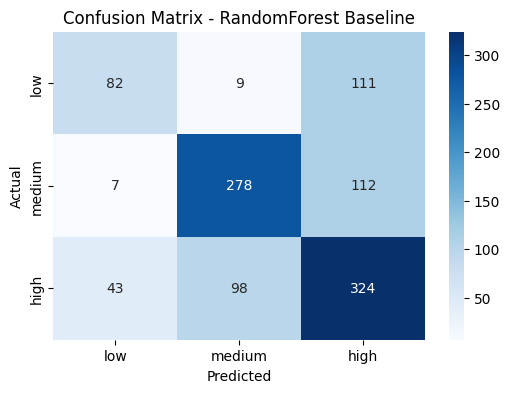

In [36]:
# ================================
# RandomForest Classifier 
# ================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize model with class_weight balanced to handle imbalance
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low','medium','high']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low','medium','high'],
            yticklabels=['low','medium','high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest Baseline")
plt.show()


#### Hyperparameter Tunning

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters found by GridSearchCV:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report - Tuned RandomForest:
              precision    recall  f1-score   support

         low       0.59      0.52      0.55       202
      medium       0.71      0.71      0.71       397
        high       0.61      0.64      0.62       465

    accuracy                           0.64      1064
   macro avg       0.64      0.62      0.63      1064
weighted avg       0.64      0.64      0.64      1064



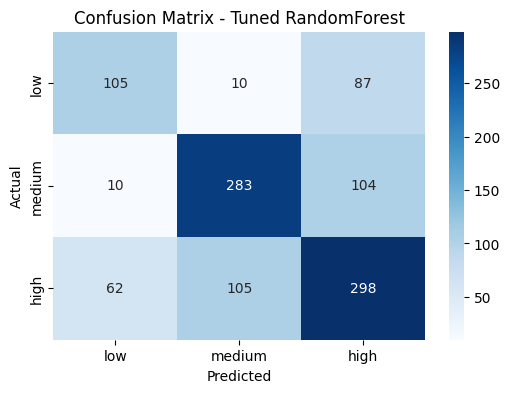

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  # macro F1 to handle imbalance
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # use all cores
    verbose=2,
    error_score='raise'  # raise error instead of setting nan
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report - Tuned RandomForest:")
print(classification_report(y_test, y_pred, target_names=['low','medium','high']))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low','medium','high'],
            yticklabels=['low','medium','high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned RandomForest")
plt.show()


#### plot feature importance

Top features by importance:
                 Feature  Importance
10               alcohol    0.162826
7                density    0.115358
1       volatile acidity    0.098418
4              chlorides    0.087676
6   total sulfur dioxide    0.084088
9              sulphates    0.081923
5    free sulfur dioxide    0.078567
8                     pH    0.075851
3         residual sugar    0.073978
2            citric acid    0.073360
0          fixed acidity    0.064495
11             wine_type    0.003459


C:\Users\ramme\AppData\Local\Temp\ipykernel_9204\3356189549.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


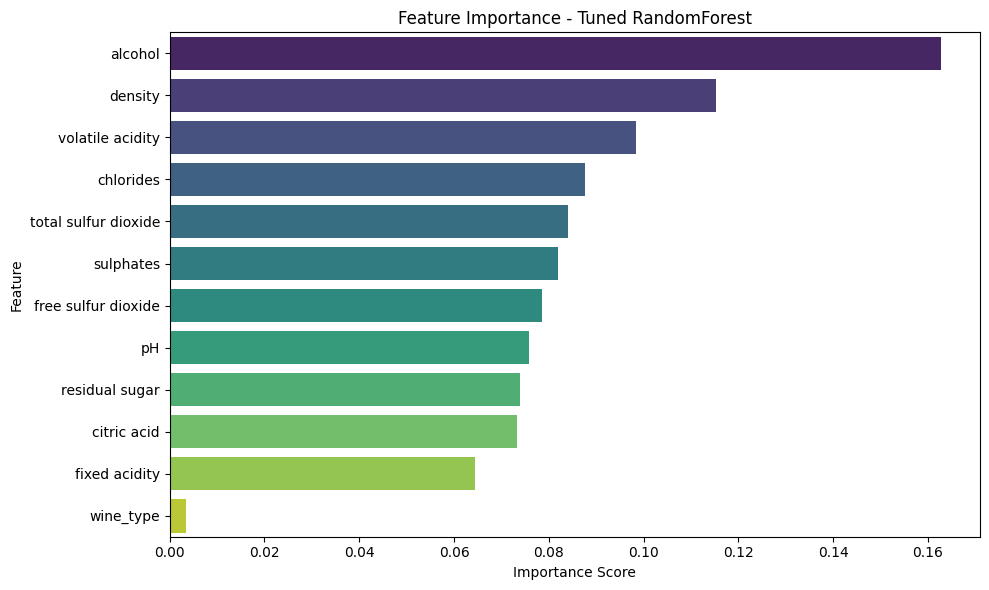

In [38]:

# Extract feature importances
importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top features by importance:")
print(feat_importance_df)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance - Tuned RandomForest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Classification Report - RF with Selected Features (dropped wine_type & fixed acidity):
              precision    recall  f1-score   support

         low       0.61      0.52      0.57       202
      medium       0.70      0.71      0.71       397
        high       0.61      0.65      0.63       465

    accuracy                           0.65      1064
   macro avg       0.64      0.63      0.63      1064
weighted avg       0.65      0.65      0.65      1064



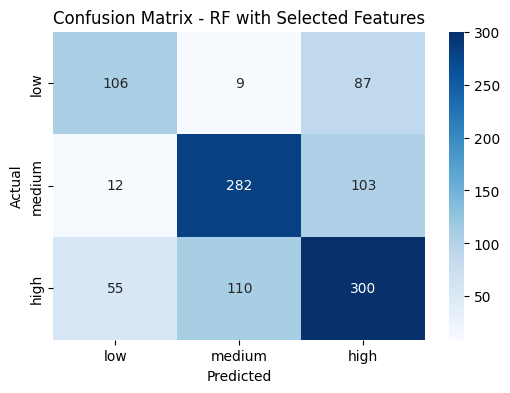

In [39]:
# ===============================
# Feature Selection Experiment
# Drop very low-importance features
# ===============================

# Drop 'wine_type' and 'fixed acidity'
X_train_fs = X_train.drop(columns=['wine_type', 'fixed acidity'])
X_test_fs  = X_test.drop(columns=['wine_type', 'fixed acidity'])

# Initialize RandomForest with previously best parameters
rf_fs = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)

# Fit on reduced feature set
rf_fs.fit(X_train_fs, y_train)

# Predict
y_pred_fs = rf_fs.predict(X_test_fs)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Classification Report - RF with Selected Features (dropped wine_type & fixed acidity):")
print(classification_report(y_test, y_pred_fs, target_names=['low','medium','high']))

# Confusion Matrix
cm_fs = confusion_matrix(y_test, y_pred_fs)
plt.figure(figsize=(6,4))
sns.heatmap(cm_fs, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low','medium','high'],
            yticklabels=['low','medium','high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF with Selected Features")
plt.show()
